# Klassifikation und Regression mit der *scikit-learn* Bibliothek

## Klassifikation

Bei einer Klassifikation wird ein Datenpunkt $\mathbf{x}$ einer von $N$ Klassen zugeordnet. Die einzelnen Einträge von $\mathbf{x}$ werden *Features* genannt, $\mathbf{x}$ ist ein *Feature-Vektor*.
<br>
**Zwei Klassen und zwei Features**:
<br>
<img src="images/2_classes.png" alt="2 Klassen" width="300"/>
<br>
**Drei Klassen und drei Features**:
<br>
<img src="images/3_classes_3d.png" alt="3 Klassen" width="300"/>

Ein Klassifikator ist eine *Funktion*, die einen Datenpunkt erhält und für diesen eine Klasse ausgibt: 
$$ f(\mathbf{x}) = \text{class}$$
Ziel ist es nun eine *Funktion* $f$ zu finden, die für möglichst alle Datenpunkte die richtige Klasse ausgibt. Dafür gibt es bereits verschiedene Machine Learning Verfahren. Die gängigsten sind in der Python-Bibliothek *scikit-learn* implementiert.  


# Übungsaufgaben

## Dataset: Iris

Verfügbar unter: https://datahub.io/machine-learning/iris/r/iris.csv. Dieser Datensatz enthält 4 Features für 3 verschiedene Spezies (Klassen) der Schwertlilie.

In [1]:
# Load pandas
import pandas as pd

# Plotting library
import seaborn as sns
import matplotlib.pyplot as plt

# render plots in jupyter notebook
%matplotlib inline

## 1. Datensatz einlesen und vorverarbeiten

a) Lies den Datensatz mithilfe von Pandas ein und mach dich mit ihm vertraut. Wie groß ist der Datensatz? Welche Features gibt es?

In [2]:
df = pd.read_csv("data/iris.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe

<bound method NDFrame.describe of      sepallength  sepalwidth  petallength  petalwidth           class
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]>

b) Unterteile das DataFrame in die zwei DataFrames ```df_features``` und ```df_class```, die nur die entsprechenden Größen enthalten.

In [5]:
df_features = df[["sepallength", "sepalwidth", "petallength", "petalwidth"]]
df_class = df[["class"]]

c) ```df_class``` enthält die Klassen in Form von Strings. Diese Darstellung ist für die nachfolgenden Arbeitsschritte ungeeignet. Bringe das DataFrame ```df_class``` mithilfe von Pandas in folgende Form:<br>
<img src="images/one_hot_encoded.png" alt="One hot encoded" width="200"/>

**Tipp:** Dieses Darstellung nennt man auch *One Hot Encoding*.

In [6]:
pd.get_dummies(df_class)

,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


d) Um zu überprüfen, ob der Klassifikator fremde Datenpunkte zuordnen kann, muss der Datensatz in ein *Trainingsset* und ein *Testset* unterteilt werden. Der Klassifikator wird auf dem *Trainingsset* trainiert und seine Performace auf dem *Testset* validiert, welches er zuvor nie gesehen hat. So wird sichergestellt, dass er die Datenpunkte nicht "auswendig lernt". 

Teile den Datensatz mithilfe der *scikit-learn*-Bibliothek in *Trainings-* und *Testset* auf. Dabei soll der Trainingsdatensatz 75% der Datenpunkte enthalten.

In [8]:
import sklearn.model_selection 
from sklearn.model_selection import train_test_split
training_x, test_x, training_y, test_y = sklearn.model_selection.train_test_split(df_features, df_class, train_size=0.75)

## 2. k-nearest-neighbors

Der *k-nearest-neighbors*-Klassifikator vergleicht einen fremden Datenpunkt mit den $k$ Datenpunkten aus dem *Trainingsset* , welche die kürzeste euklidsche Distanz zu dem neuen Datenpunkt besitzen. Der Datenpunkt erhält dann die Klasse, die der Mehrheit der umliegenden Datenpunkte entspricht. Darum wird $k$ immer ungerade gewählt.

a) Importiere den *k-nearest-neighbors*-Klassifikator aus der *scikit-learn*-Bibliothek und initialisiere eine Instanz des Klassifikators mit 7 nächsten Nachbarn.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors=7)

b) Trainiere den Klassifikator auf dem Trainingsdatensatz.

In [10]:
neigh.fit(training_x,training_y)

C:\Users\cn_hy\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

c) Der Klassifikator kann jetzt einen neuen Datenpunkt erhalten und ihn einer der drei Klassen zuordnen. Wende die ```predict()```-Methode des Klassifikators auf die Test-Datenpunkte an und lass dir das Ergebnis ausgeben.  Was bedeutet die Ausgabe?

In [11]:
print(neigh.predict(test_x))
print(test_y)

['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa']
               class
144   Iris-virginica
143   Iris-virginica
132   Iris-virginica
43       Iris-setosa
146   Iris-virginica
95   Iris-versicolor
27       Iris-setosa
113   Iris-virginica
7        Iris-setosa
115   Iris-virginica
94   Iris-versicolor
58   Iris-versicolor
55   Iris-versicolor
8        Iris-setosa
30       Iris-setosa
12       Iris-setosa
130   Iris-virginica


<br>
<img src="images/table.jpeg" alt="Tabelle" width="600"/>
<br>

d) 


Die Accuracy des Klassifikators kann berechnet werden als 
$$ \text{Accuracy} = \frac{\text{#TP + #TN}}{\text{#TP + #TN + #FP + #FN}}$$
mit TP = True Positives, TN = True Negatives, FP = False Positives und FN = False Negatives.
Berechne die Accuracy auf dem Testdatensatz und überprüfe dein Ergebnis mit der ```score()```-Methode.

In [12]:
neigh.score(test_x,test_y)

1.0

e) Verändere die Anzahl an nächsten Nachbarn im Klassifikator und beobachte, wie sich dieser Parameter auf die Accuracy auswirkt.

In [13]:
neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors=2)
neigh.fit(training_x,training_y)
neigh.score(test_x,test_y)

C:\Users\cn_hy\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9473684210526315

## 3. Decision Trees

Decision Trees klassifizieren den Datensatz anhand einfacher Entscheidungsregeln, z.B:
```python
if Feature_1 > 0.5:
    return Class_A
else:
    return Class_B
```
Um die Koplexität des Datensatzes widerzuspiegeln werden mehrere dieser Entscheidungsknoten aneinandergehängt. Diese Knoten bilden dann den Entscheidungsbaum. Der Decision Tree Algorithmus versucht Entscheidungsregeln zu finden, die den Trainingsdatensatz bestmöglich trennen.

a) Importiere den *DecisionTree*-Klassifikator aud der *scikit-learn*-Bibliothek und initialisiere eine Instanz des Klassifikators.

In [14]:
from sklearn import tree

b) Nimm eine Klassifikation auf dem Iris-Datensatz vor. Benutze dieses mal nur die Features 'sepallength' und 'sepalwidth' für die Klassifikation. Berechne die Accuracy mit mit der ```score()```-Methode.

In [15]:
training_x2 = training_x[["sepallength","sepalwidth"]]
print(training_x2)
print(training_y)
clf = tree.DecisionTreeClassifier()
clf.fit(training_x2,training_y)
clf.score(training_x2,training_y)

     sepallength  sepalwidth
137          6.4         3.1
103          6.3         2.9
50           7.0         3.2
111          6.4         2.7
40           5.0         3.5
..           ...         ...
148          6.2         3.4
21           5.1         3.7
49           5.0         3.3
73           6.1         2.8
61           5.9         3.0

[112 rows x 2 columns]
               class
137   Iris-virginica
103   Iris-virginica
50   Iris-versicolor
111   Iris-virginica
40       Iris-setosa
..               ...
148   Iris-virginica
21       Iris-setosa
49       Iris-setosa
73   Iris-versicolor
61   Iris-versicolor

[112 rows x 1 columns]


0.9375

c) Führe den nachfolgenden Code aus. Was genau wird abgebildet? In welchen Merkmalen des Schaubildes spiegelt sich die Funktionsweise eines Entscheidungsbaumes wider?

In [20]:
# train and test set split
X_train = training_x

In [21]:

import numpy as np
from matplotlib.colors import LinearSegmentedColormap

colors = [(0, 0, 1), (1, 0.6, 0), (0, 1, 0)]
cm = LinearSegmentedColormap.from_list(
        'custom', colors, N=3)

x_min, x_max = X_train['sepallength'].min() - 1, X_train['sepallength'].max() + 1
y_min, y_max = X_train['sepalwidth'].min() - 1, X_train['sepalwidth'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = np.argmax(clf.predict(np.c_[xx.ravel(), yy.ravel()]), axis=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5, cmap=cm)

sns.scatterplot(x='sepallength', y='sepalwidth', data=df, hue='class')
plt.show()

C:\Users\cn_hy\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


AxisError: axis 1 is out of bounds for array of dimension 1

## 4. Random Forest und Metriken

Ein Random Forest Klassifikator setzt sich aus mehreren Decision Trees zusammen. Beim Prädizieren wird die finale Klasse durch eine Mehrheitsentscheidung festgelegt.

a) Lies den Datensatz *3d_printer.csv* mit pandas ein und teile den Datensatz in Testset und Trainingsset auf. Das Label/ die Zielgröße soll dabei die Spalte *material* sein. Transfomiere dieses mal die kategorischen Spalten *infill_pattern* und *material* mit dem ```LabelBinarizer``` von *scikit-learn* und dessen Methode ```fit_transform()```.

In [42]:
df2 = pd.read_csv("data/3d_printer.csv")

df2_label = df2["material"]
df2_feature = df2["infill_pattern"]

import sklearn.model_selection 
from sklearn.model_selection import train_test_split
training_x, test_x, training_y, test_y = sklearn.model_selection.train_test_split(df2_feature, df2_label, train_size=0.75)

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
df2_feature = lb.fit_transform(df2_feature)
df2_label= lb.fit_transform(df2_label)

b) Importiere den Random Forest Klassifikator der *scikit-learn*-Bibliothek mit ```n_estimators=50``` und ```max_depth=3``` und trainiere diesen auf dem Datensatz.

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50 ,max_depth=3)
clf.fit(df2_feature,df2_label)

C:\Users\cn_hy\AppData\Local\Temp/ipykernel_16264/3792332688.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(df2_feature,df2_label)


RandomForestClassifier(max_depth=3, n_estimators=50)

Die Accuracy eine Klassifikators ist nur eine vielen Metriken, mit denen sich die Qualität eines Models messen lässt. Für Datensätze mit einer sehr ungleichen Klassenverteilung kann die Accuracy hoch sein, da der Klassifikator meist die häufigere Klasse prädiziert. Aus der Accuracy kann dann jedoch keine Aussage über die Fähigkeiten des Modells bezüglich der kleineren Klasse getroffen werden. Für diesen Fall wählt man häufig die Metriken Precision und Recall. Die Precision ist definiert als $$ \text{Precision} = \frac{\text{#TP}}{\text{#TP + #FP}}$$ Der Recall ist gegeben durch $$ \text{Recall} = \frac{\text{#TP}}{\text{#TP + #FN}}$$

c) Berechne Precision und Recall für obigen Klassifikator mithilfe der eingebauten scikit Funktionen.

In [48]:
df2_predict = clf.predict(df2_feature)
print(sklearn.metrics.classification_report(df2_label, df2_predict))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        25
           1       0.60      0.60      0.60        25

    accuracy                           0.60        50
   macro avg       0.60      0.60      0.60        50
weighted avg       0.60      0.60      0.60        50



## 5. Support Vector Machine

Die Support Vector Machine versucht eine Hyperebene zu finden, die einen gegebenen Datensatz bestmöglich trennt:
<br>
<img src="images/2_classes_svm.png" alt="2 Klassen" width="300"/>

Diese Hyperebene ist definiert über einen Normalenvektor $\mathbf{w}$, der durch den Ursprung verläuft und einen Abstand zum Ursprung $b$. Ziel ist es also $\mathbf{w}$ und $b$ so zu wählen, dass der Datensatz möglichst eindeutig getrennt werden kann. Punkte auf der Hyperebene erfüllen die Ebenengleichung
$$ \mathbf{w} \cdot \mathbf{x} + b = 0.$$
Für Punkte links oder rechts der Hyperebene gilt
$$ \mathbf{w} \cdot \mathbf{x} + b < 0 \quad \text{bzw.} \quad \mathbf{w} \cdot \mathbf{x} + b > 0 .$$
Für zwei Klassen kann dann eine Klassifikation mittels $y_i = \text{sgn}(\mathbf{w} \cdot \mathbf{x}_i + b)$ erfolgen. Der Abstand zwischen Datenpunkten und Hyperebene ist dann maximal, wenn der Betrag von $\mathbf{w}$ minimal ist unter der Nebenbedingung, dass sich möglichst alle Datenpunkte auf der korrekten Seite der Hyperebene befinden, geschrieben als $y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1$. Dies führt zu dem Optimierungsproblem
$$ L(\mathbf{w}, b, \lambda) = \frac{1}{2} ||\mathbf{w}||^2 - \sum_{i=1}^N \lambda_i (y_i (\mathbf{w} \cdot \mathbf{x}_i + b)-1) $$

Im Realfall lässt sich ein Datensatz meist nicht perfekt sauber trennen. Um das Minimierungsproblem trotzdem lösen zu können wird daher noch ein Term mit Schlupfvariablen $\xi_i$ eingeführt, der die strenge Minimierung auflockert und mit einer positiven Konstante $C$ skaliert wird:
$$ C \sum_{i=1}^N\xi_i$$

a) Im unteren Block wird ein synthetischer Datensatz aus einer Sinus-Funktion und Rauschen konstruiert. Plotte den Datensatz mithilfe von *matplotlib* oder *seaborn*.

In [57]:
X = np.linspace(0,4,100).reshape(-1, 1)
y = np.sin(X)+ np.random.uniform(low=-0.3, high=0.3, size=X.shape)

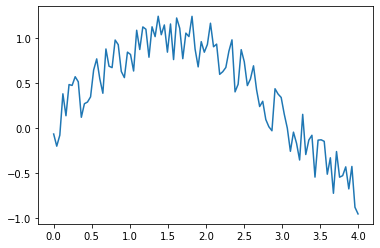

In [58]:
plt.plot(X,y)

b) Importiere den Support Vector Regressor der *scikit-learn*-Bibliothek und initialiere eine Instanz dieser Klasse. Nimm wieder einen Train-Test-Split vor und trainiere den Regressor auf den Trainingsdaten. Prädiziere nun auf den Testdatensatz und stelle die vorhergesagten Werte sowie den ursprünglichen Datensatz in einem Diagramm dar. Wähle für die Support Vector Machine die Option ```C``` manuell. Wähle dabei für ```C``` die Werte 0.01, 10 und 1000. Was funktioniert am besten? 

In [70]:
from sklearn.svm import SVR

training_x3, test_x3, training_y3, test_y3 = sklearn.model_selection.train_test_split(X, y, train_size=0.75)

regr = SVR(C=0.01)
regr.fit(training_x3,training_y3)
regr.score(training_x3,training_y3)

C:\Users\cn_hy\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.34700772529858415

In [71]:
regr = SVR(C=10)
regr.fit(training_x3,training_y3)
regr.score(training_x3,training_y3)

C:\Users\cn_hy\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8961203158660327

In [72]:
regr = SVR(C=1000)
regr.fit(training_x3,training_y3)
regr.score(training_x3,training_y3)

C:\Users\cn_hy\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9015864404726542

c) Wir wollen nun versuchen, den $y$-Wert zu einem einzelnen Datenpunkt vorherzusagen. Prädiziere mit deinem Regressor den $y$-Wert zu einem Wert von $x>4$ und vergleiche es mit $\sin (x)$. Was fällt dir auf? Wie kommt der Unterschied zustande? Tipp: Die ```predict()```-Methode benötigt einen Wert in der Form ``` predict([[5]])```

In [75]:
example_x = 4.8
print(regr.predict([[example_x]]))

[-4.08785067]


In [76]:
example_y = np.sin(example_x)
print(example_y)

-0.9961646088358407


#### Klassifikation mit SVM

In den folgenden Blöcken ist das Training einer Support Vector Machine zur Klassifikation des Moon-Datensatzes implementiert. Führe die Codeblöcke zunächst aus und versuche alle Trainingsschritte nachzuvollziehen. Erhöhe jetzt die Anzahl der Trainingspunkte (bis maximal 10000). Was fällt dir beim Training auf? Miss die Dauer des Trainings mithilfe der Python-Module `time` oder `datetime` und plotte die Trainingsdauer in Abhängigkeit der Anzahl an Datenpunkten. Welches Verhalten kannst du erkennen?

In [85]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np


noisy_moons, labels = datasets.make_moons(n_samples=500, noise=.2)
X_train, X_test, y_train, y_test = train_test_split(noisy_moons, labels, test_size=0.25)


clf = SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

No handles with labels found to put in legend.


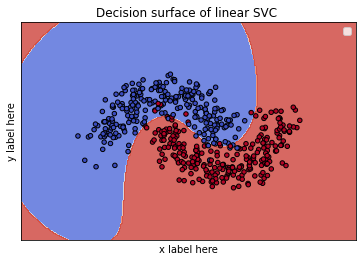

In [86]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = noisy_moons[:, 0], noisy_moons[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=labels, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

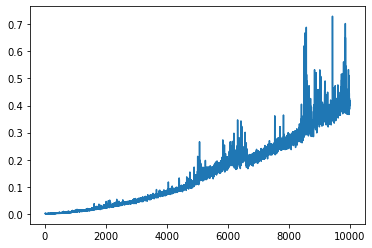

In [84]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
import time

trainingspunkte = 0
dauer = []


for trainingspunkte in range(10,10000):
    noisy_moons, labels = datasets.make_moons(n_samples=trainingspunkte, noise=.2)
    X_train, X_test, y_train, y_test = train_test_split(noisy_moons, labels, test_size=0.25)
    
    t1 = time.time()
    
    clf = SVC()
    clf.fit(X_train, y_train)
    clf.score(X_test, y_test)
    
    t2 = time.time()
    dauer.append(t2-t1)

plt.plot(range(10,10000),dauer)